In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
X_Train=pd.read_csv("Diabetes_XTrain.csv")
Y_Train=pd.read_csv("Diabetes_YTrain.csv")
X_Test=pd.read_csv("Diabetes_XTest.csv")


In [119]:
X_Train.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
5,7,100,0,0,0,30.0,0.484,32
6,4,110,66,0,0,31.9,0.471,29
7,1,111,86,19,0,30.1,0.143,23
8,3,169,74,19,125,29.9,0.268,31
9,1,71,62,0,0,21.8,0.416,26


In [120]:
Y_Train.head(20)

,Outcome
0,1
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,1
9,0


In [121]:
X_Test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


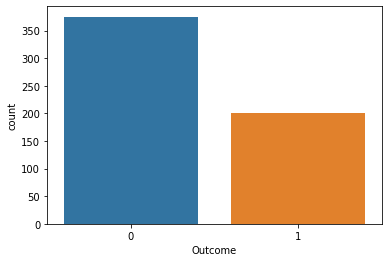

In [122]:
sns.countplot("Outcome",data=Y_Train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2DC0CB608>,
      dtype=object)

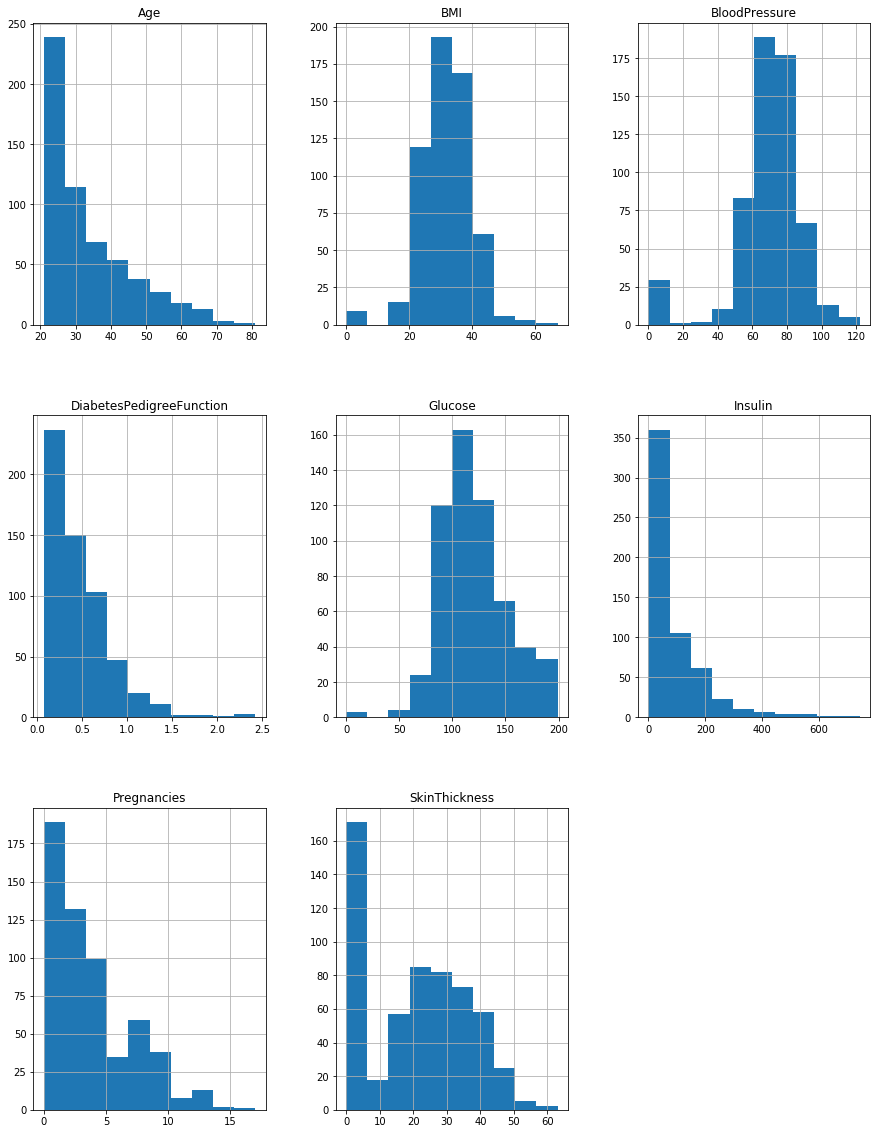

In [123]:
X_Train.hist(figsize = (15,20))



In [124]:
X_Train=X_Train.values
Y_Train=Y_Train.values
X_Test=X_Test.values

In [125]:
def distance(x1,x2):
    return (np.sqrt(np.sum((x1-x2)**2)))

In [126]:
def knn(x_train,y_train,x_test,k=15):
    vals=[]
    
    for i in range(x_train.shape[0]):
        d=distance(x_train[i],x_test)
        vals.append((d,y_train[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

In [127]:
pred=[]
for i in range(X_Test.shape[0]):
    my_pred=knn(X_Train,Y_Train,X_Test[i])
    pred.append(my_pred)
df=pd.DataFrame(pred)

In [128]:
df.columns=["Predicted Output"]

In [129]:
df.head()

,Predicted Output
0,1
1,0
2,0
3,0
4,0


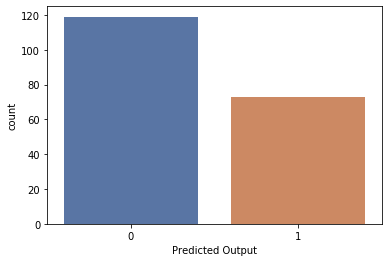

In [140]:
sns.countplot("Predicted Output",data=df,palette="deep")#0=Diabetic,1=Non-Diabetic